# Klasifikasi Citra Penyakit Radang Paru-Paru dan Paru Paru Terindikasi COVID19 Menggunakan Metode CNN

Link Kaggle : https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia

# Import

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

# Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul"

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul/Datasplit

/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul/Datasplit


In [ ]:
!ls

Model_tubes5.h5  test  train  val


# Load Data

In [ ]:
data_dir = r'/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul/Datasplit'
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

# Preprocessing (Skenario 2)

In [ ]:
image_shape = (100,100,1)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(100,100),
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 5144 images belonging to 3 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(100,100),
                                               color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 68 images belonging to 3 classes.


# Modelling & Plotting (Skenario 8)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss',patience=2, verbose = 1)

best_model_path = 'Model2_tubes5.h5'
checkpoint_callback = ModelCheckpoint(best_model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
batch_size = 64

In [ ]:
print(train_image_gen.class_indices)
print(test_image_gen.class_indices)

{'COVID 19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
{'COVID 19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}


In [ ]:
results = model.fit(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                             callbacks=[checkpoint_callback])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.7578 - accuracy: 0.6800 
Epoch 00001: val_accuracy improved from -inf to 0.73529, saving model to Model2_tubes5.h5
81/81 [==============================] - 3298s 41s/step - loss: 0.7578 - accuracy: 0.6800 - val_loss: 0.5454 - val_accuracy: 0.7353
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.4957 - accuracy: 0.7910
Epoch 00002: val_accuracy improved from 0.73529 to 0.86765, saving model to Model2_tubes5.h5
81/81 [==============================] - 160s 2s/step - loss: 0.4957 - accuracy: 0.7910 - val_loss: 0.3427 - val_accuracy: 0.8676
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.4244 - accuracy: 0.8320
Epoch 00003: val_accuracy improved from 0.86765 to 0.89706, saving model to Model2_tubes5.h5
81/81 [==============================] - 159s 2s/step - loss: 0.4244 - accuracy: 0.8320 - val_loss: 0.3116 - val_accuracy: 0.8971
Epoch 4/50
81/81 [==============================]

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.757789,0.680016,0.545412,0.735294
1,0.495666,0.791019,0.342669,0.867647
2,0.424407,0.832037,0.311563,0.897059
3,0.410848,0.837092,0.315198,0.882353
4,0.383509,0.850311,0.292538,0.897059
5,0.370664,0.853616,0.332986,0.897059
6,0.345076,0.866641,0.284300,0.897059
7,0.331194,0.875389,0.244420,0.911765
8,0.329548,0.872667,0.257224,0.882353
9,0.332660,0.876166,0.298255,0.882353


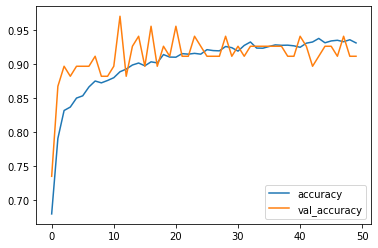

In [ ]:
loss_df[['accuracy', 'val_accuracy']].plot()

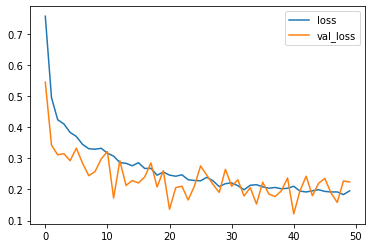

In [ ]:
loss_df[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(test_image_gen)

2/2 [==============================] - 2s 80ms/step - loss: 0.2269 - accuracy: 0.9412


[0.2268873155117035, 0.9411764740943909]

In [ ]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.76      0.87        17
           2       0.92      1.00      0.96        44

    accuracy                           0.94        68
   macro avg       0.97      0.92      0.94        68
weighted avg       0.95      0.94      0.94        68



[[ 7  0  0]
 [ 0 13  4]
 [ 0  0 44]]


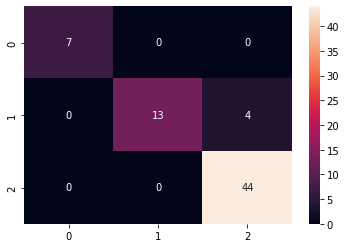

In [ ]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)

# Prediksi Gambar

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from keras.preprocessing import image

In [ ]:
from google.colab import files

In [ ]:
uploaded2 = files.upload()

for fn in uploaded2.keys():
 
  # Prediksi Gambar
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size=64)

  print('Prediksi = ',classes[0][0])
  
  # Prediksi Gambar 
  # Benign 0 - <1 / Malignant >1
  if classes[0][0] >= 0 and classes[0][0] < 1:
    print('\nModel 1, Prediksi Gambar adalah Covid 19')
  else:
    print('Model 1, Prediksi Gambar adalah Normal')